In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('./dataset/adult.data.txt', sep=", ", header=None)
df.columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", \
              "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "salary-range"]
df = df[df["workclass"] != '?']
df = df[df["education"] != '?']
df = df[df["marital-status"] != '?']
df = df[df["occupation"] != '?']
df = df[df["relationship"] != '?']
df = df[df["race"] != '?']
df = df[df["sex"] != '?']
df = df[df["native-country"] != '?']
below_50K = df[df["salary-range"] == "<=50K"].sample(n=7841)
above_50K = df[df["salary-range"] == ">50K"]

df = pd.concat([above_50K, below_50K])
df['class'] = (df["salary-range"] == ">50K")*1

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
def plot_scatter_plot(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(10,10))
    fig.subplots_adjust(hspace=.5)
    
    x = below_50K[column1]
    y = below_50K[column2]
    axes[0, 0].scatter(x,y)
    axes[0, 0].set_title("<=50K")
    axes[0, 0].set_xlabel(column1)
    axes[0, 0].set_ylabel(column2)
    
    x = above_50K[column1]
    y = above_50K[column2]
    axes[0, 1].scatter(x,y)
    axes[0, 1].set_title(">50K")
    axes[0, 1].set_xlabel(column1)
    axes[0, 1].set_ylabel(column2)
    
    x = below_50K[column2]
    y = below_50K[column3]
    axes[1, 0].scatter(x,y)
    axes[1, 0].set_title("<=50K")
    axes[1, 0].set_xlabel(column2)
    axes[1, 0].set_ylabel(column3)
    
    x = above_50K[column2]
    y = above_50K[column3]
    axes[1, 1].scatter(x,y)
    axes[1, 1].set_title(">50K")
    axes[1, 1].set_xlabel(column2)
    axes[1, 1].set_ylabel(column3)
    
    x = below_50K[column3]
    y = below_50K[column1]
    axes[2, 0].scatter(x,y)
    axes[2, 0].set_title("<=50K")
    axes[2, 0].set_xlabel(column3)
    axes[2, 0].set_ylabel(column1)
    
    x = above_50K[column3]
    y = above_50K[column1]
    axes[2, 1].scatter(x,y)
    axes[2, 1].set_title(">50K")
    axes[2, 1].set_xlabel(column3)
    axes[2, 1].set_ylabel(column1)
    
    plt.show()

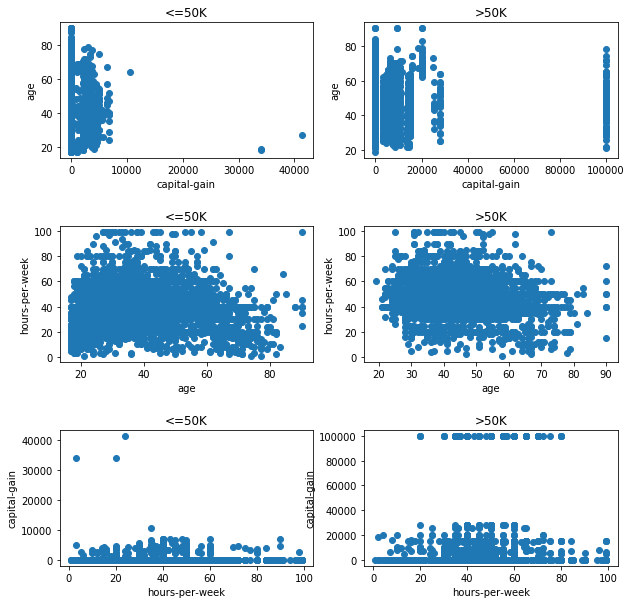

In [4]:
plot_scatter_plot('capital-gain', 'age', 'hours-per-week')

In [5]:
def plot_scatter_plot_diff(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(10,30))
    fig.subplots_adjust(hspace=.5)
    
    colors = df['class']
    x = df[column1]
    y = df[column2]
    axes[0].scatter(x,y,c=colors)
    axes[0].set_title("purple <=50K, yellow >50K")
    axes[0].set_xlabel(column1)
    axes[0].set_ylabel(column2)
    
    x = df[column2]
    y = df[column3]
    axes[1].scatter(x,y,c=colors)
    axes[1].set_title("purple <=50K, yellow >50K")
    axes[1].set_xlabel(column2)
    axes[1].set_ylabel(column3)
    
    x = df[column3]
    y = df[column1]
    axes[2].scatter(x,y,c=colors)
    axes[2].set_title("purple <=50K, yellow >50K")
    axes[2].set_xlabel(column3)
    axes[2].set_ylabel(column1)
    
    plt.show()

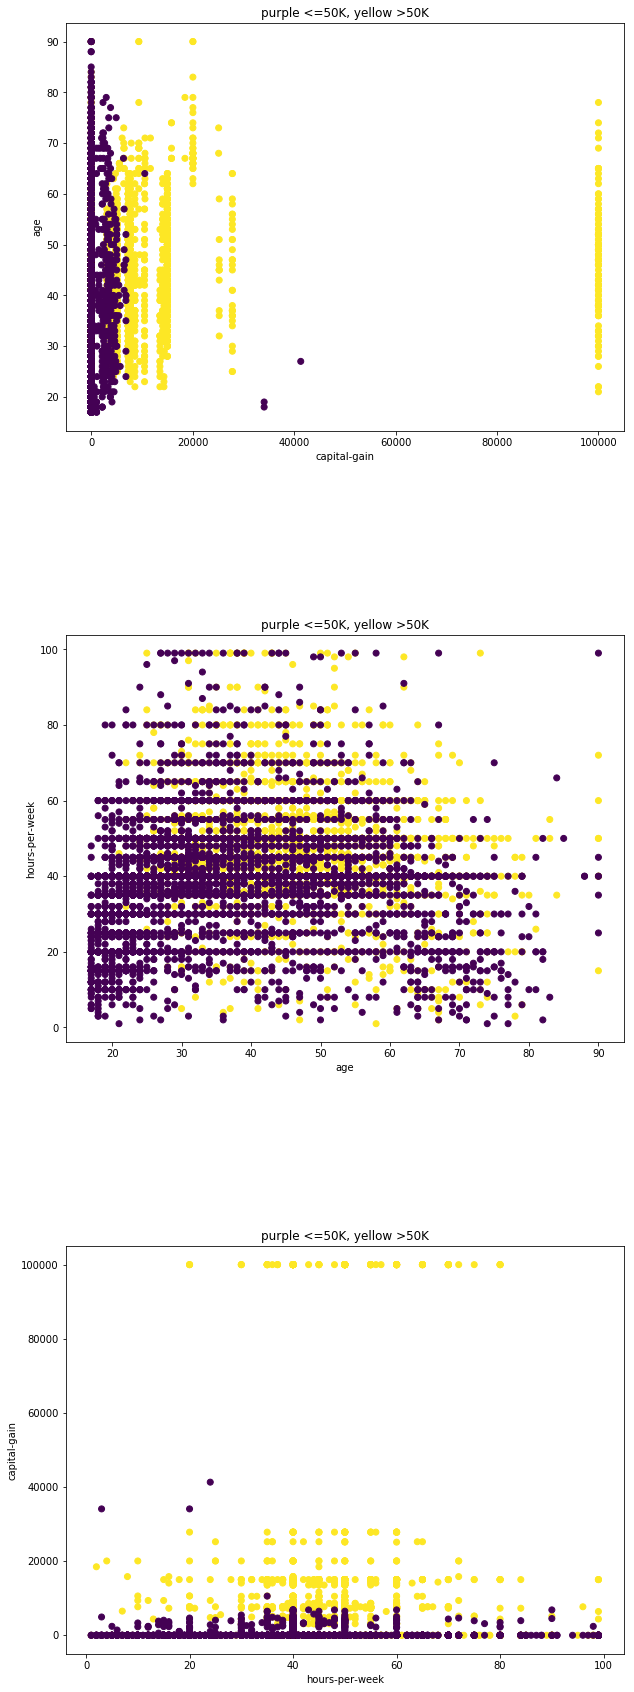

In [6]:
plot_scatter_plot_diff('capital-gain', 'age', 'hours-per-week')

In [7]:
def plot_scatter_matrix_below50K(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,11))
    fig.subplots_adjust(hspace=.5)
    df_below_sm = below_50K[[column1, column2, column3]]
    print("Salary <=50K")
    pd.plotting.scatter_matrix(df_below_sm, ax=axes)
    plt.show()

Salary <=50K


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """Entry point for launching an IPython kernel.


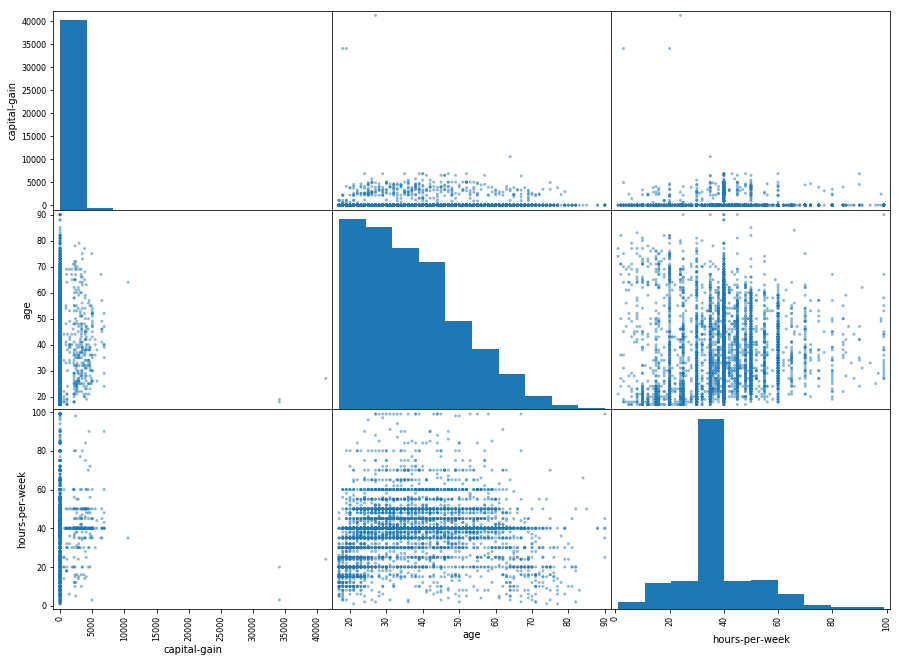

In [8]:
plot_scatter_matrix_below50K('capital-gain', 'age', 'hours-per-week')

In [9]:
def plot_scatter_matrix_above50K(column1, column2, column3):
    plt.close()
    fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,11))
    fig.subplots_adjust(hspace=.5)
    df_above_sm = above_50K[[column1, column2, column3]]
    print("Salary >50K")
    pd.plotting.scatter_matrix(df_above_sm, ax=axes)
    plt.show()

Salary >50K


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """Entry point for launching an IPython kernel.


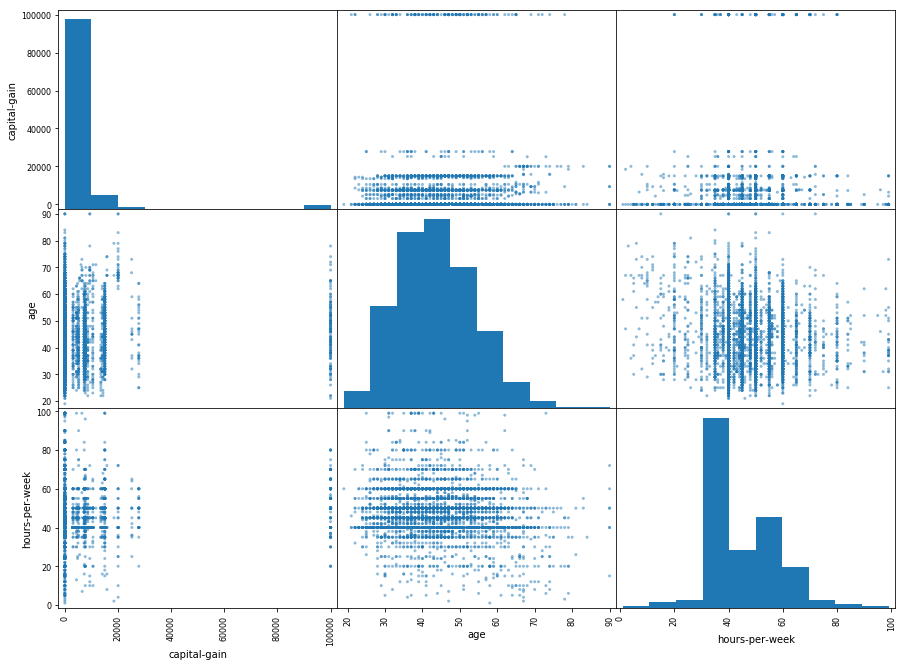

In [10]:
plot_scatter_matrix_above50K('capital-gain', 'age', 'hours-per-week')

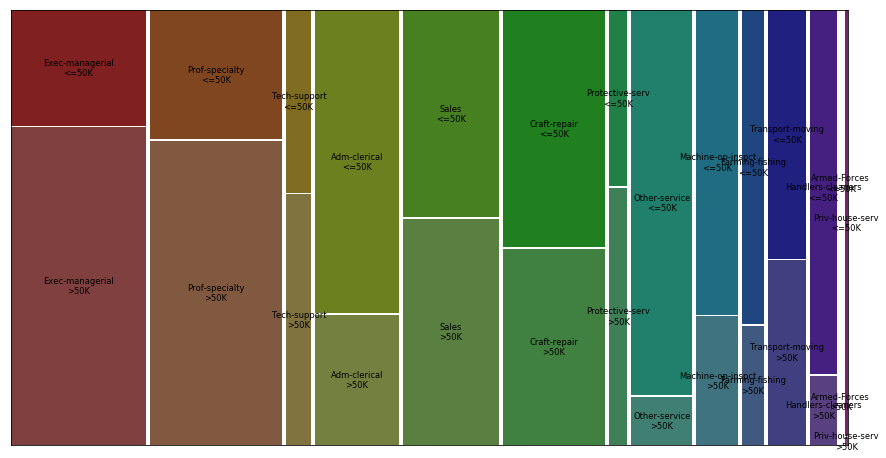

In [11]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['occupation', 'salary-range'], ax=axes, axes_label=False)
plt.show()

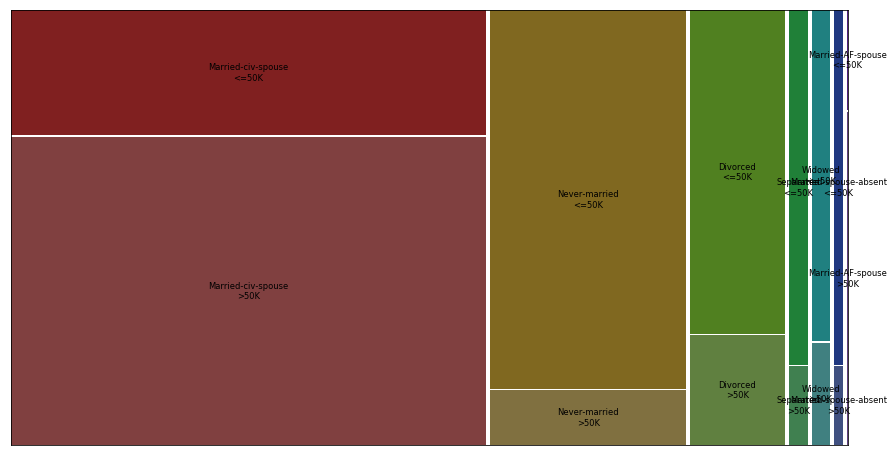

In [12]:
plt.close()
fig, axes = plt.subplots(ncols=1, nrows=1, figsize=(15,8))
fig.subplots_adjust(hspace=.5)
mosaic(df, ['marital-status', 'salary-range'], ax=axes, axes_label=False)
plt.show()

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


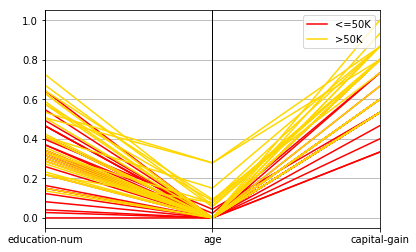

In [13]:
frame_pc = df[['education-num', 'age', 'capital-gain', 'class']].copy()
frame_np_array = MinMaxScaler().fit_transform(frame_pc.values)
frame_pc = pd.DataFrame(frame_np_array)
df.index = frame_pc.index
frame_pc['salary-range'] = df['salary-range']
frame_pc.columns = ['capital-gain', 'education-num', 'age', 'class', 'salary-range']
frame_pc_below_50K = frame_pc[frame_pc["class"] == 0.0].sample(n=30)
frame_pc_above_50K = frame_pc[frame_pc["class"] == 1.0].sample(n=30)
frame_pc = pd.concat([frame_pc_below_50K, frame_pc_above_50K])
pd.plotting.parallel_coordinates(frame_pc, 'salary-range', cols=['education-num', 'age', 'capital-gain'], color=('#FF0000',
                         '#FFD700'))
plt.show()

In [14]:
def plot_mosaic_class(column1, column2, column3):
    plt.close()
    cols = [column1, column2, column3]
    for i in range(3):
        for j in range(i+1, 3):
            print("Salary <=50K")
            mosaic(below_50K, [cols[i], cols[j]])
            plt.show()
            print("Salary >50K")
            mosaic(above_50K, [cols[i], cols[j]])
            plt.show()
    for i in range(3):
        print("Salary <=50K")
        mosaic(below_50K, [cols[i]])
        plt.show()
        print("Salary >50K")
        mosaic(above_50K, [cols[i]])
        plt.show()
    for i in range(3):
        mosaic(df, [cols[i], 'salary-range'])
        plt.show()

Salary <=50K


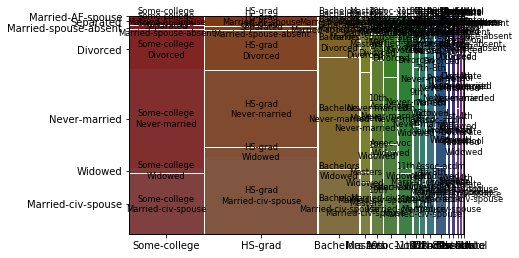

Salary >50K


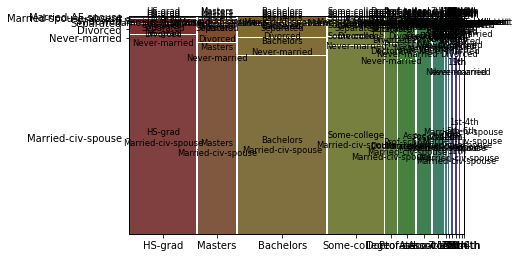

Salary <=50K


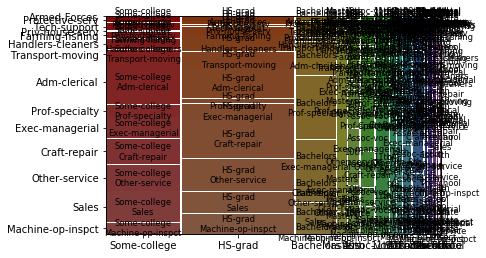

Salary >50K


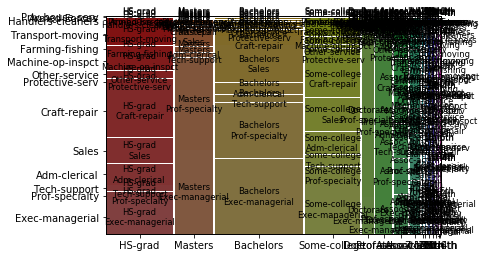

Salary <=50K


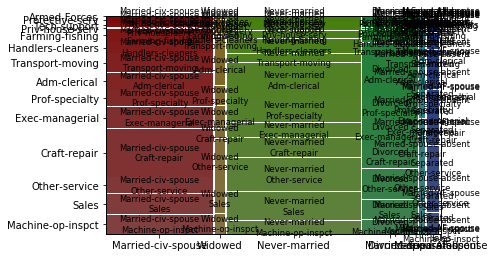

Salary >50K


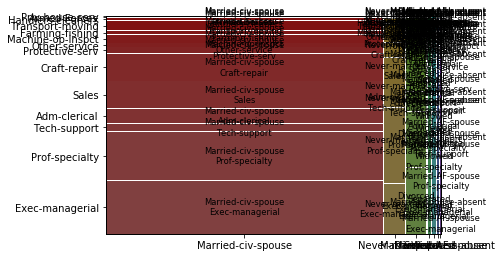

Salary <=50K


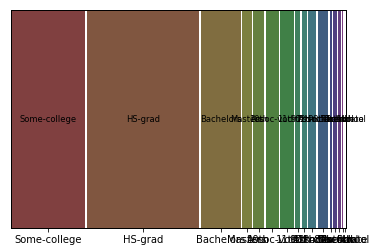

Salary >50K


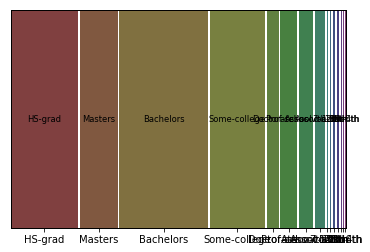

Salary <=50K


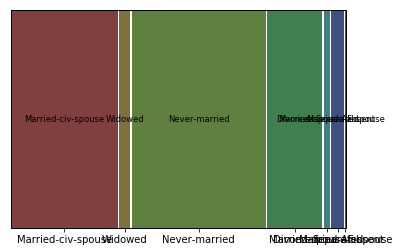

Salary >50K


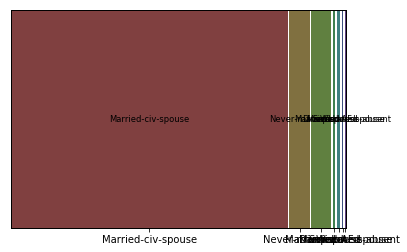

Salary <=50K


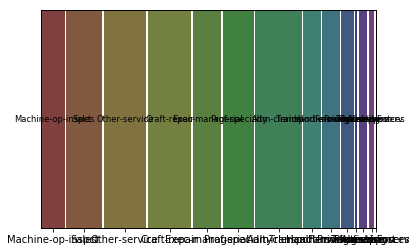

Salary >50K


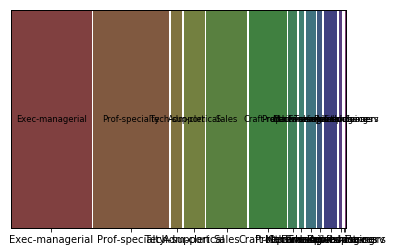

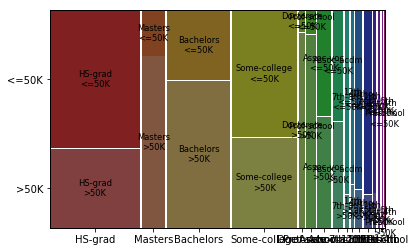

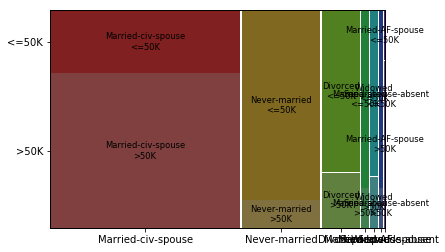

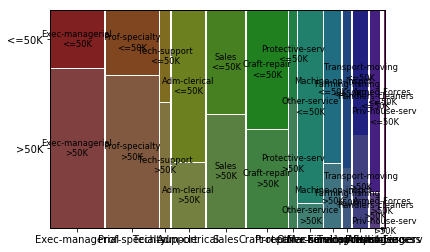

In [15]:
plot_mosaic_class('education', 'marital-status', 'occupation')